This is a general purpose image classifier that can be applied to datasets that have the data organized as shown below. To use this code select Run all. The code will prompt the user to provide the required input data. It will take only a minute or so to enter the data and your model will be up and training. I have used this code on numerous data sets with excellent results. The model will initially run for 10 epochs. After 10 epochs you are prompted to enter H to halt training or you can enter an integer that specifies how many more epochs to run. After those epochs complete you will be again prompted to continue or halt training. The code shows the % decreasee  of the validation loss at the end of each epoch. This is a good guide to use to decide to continue or halt training. As you near the bottom of the loss function the % decrease in loss becomes smaller. I typically halt training when the % decrease falls below 5%. However sometimes it is best to continue training until the loss increases. The code then automatically lowers the learning rate. This often enables the model to again start decreasing the loss. Your saved model is always returned with the weights set to those for the epoch with the lowest loss.   

data directory  
* train directory    
  * class 0
     * image 0
     * image 1
     * ......
     * image m
  * class 1
     * image 0
     * image 1
     * ......
     * image n
  * ......
  * class m
     * image 0
     * image 1
     * ......
     * image r
* valid directory ( optional if there is no validation directory validation data is created by partition of train data)  
   * class 0
     * image 0
     * image 1
     * ......
     * image x
   * class 1
     * image 0
     * image 1
     * ......
     * image y
   * ......
   * class m
     * image 0
     * image 1
     * ......
     * image z
* test directory ( optional if there is no test directory test data is created by partition of train data)  
   * class 0
     * image 0
     * image 1
     * ......
     * image a
   * class 1
     * image 0
     * image 1
     * ......
     * image b
   * ......
   * class m
     * image 0
     * image 1
     * ......
     * image c

In [339]:
#DODANO

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
'''
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'real-and-fake-face-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F105271%2F250645%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240524%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240524T072709Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5052c1006211a331d5160a7f1321d8629a8785d9dd6e7767817087ef93579d3b40a7110e0f0a8647b26a60bb335fb453fb207a3d62bd50690eb48676b7192651f6dee1619e79a2f2bd3bda6276c51bcfde183baa37b4714274f51790264fc7ae644d34c4e6904751c347eab9c96f877fedb8690bd7297a11ffbd08edb1595658e0599fd303b9f6e67d53b78aa4cb9e1ad0970ae18e85e3a97cdd2c6b6e95d9d029741c25d04bd2b590cb08f7d7c917b80b90099f7d2403f38553f75952b0b3e00885f6bb4367ecba0a0ac11b021914e52580d74f9f1f336cce256fd4c68b81ff2bb159be6f97d6acb2437185a183a380b77d7cbdc2306d5164da127107fd5fda'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')'''

'\nimport os\nimport sys\nfrom tempfile import NamedTemporaryFile\nfrom urllib.request import urlopen\nfrom urllib.parse import unquote, urlparse\nfrom urllib.error import HTTPError\nfrom zipfile import ZipFile\nimport tarfile\nimport shutil\n\nCHUNK_SIZE = 40960\nDATA_SOURCE_MAPPING = \'real-and-fake-face-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F105271%2F250645%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240524%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240524T072709Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5052c1006211a331d5160a7f1321d8629a8785d9dd6e7767817087ef93579d3b40a7110e0f0a8647b26a60bb335fb453fb207a3d62bd50690eb48676b7192651f6dee1619e79a2f2bd3bda6276c51bcfde183baa37b4714274f51790264fc7ae644d34c4e6904751c347eab9c96f877fedb8690bd7297a11ffbd08edb1595658e0599fd303b9f6e67d53b78aa4cb9e1ad0970ae18e85e3a97c

In [340]:
import pandas as pd
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import time
import matplotlib
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import time
from tqdm import tqdm
from sklearn.metrics import f1_score
from IPython.display import YouTubeVideo
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
import os

<a id="pc"></a>

<a id="pc"></a>
## <center>Define a function to print text in specified rgb foreground and background colors</center>
### Add some PZAZZ to your printed output with this function  
form of the call is:  print_in_color(txt_msg, fore_tupple, back_tupple where:
* txt_msg is the string to be printed out  
* fore_tuple is tuple of the form (r,g,b) specifying the foreground color of the text
* back_tuple is tuple of the form (r,g,b) specifying the background color of the text

In [341]:
def print_in_color(txt_msg,fore_tupple=(0,255,255),back_tupple=(100,100,100)):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    # default parameter print in cyan foreground and gray background
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m'
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

<a id="pcounts"></a>
## <center>Define a function that plots value counts for a column in a dataframe</center>

In [342]:
def plot_label_count (df, plot_title):
    column='labels'
    xaxis_label='CLASS'
    yaxis_label='IMAGE COUNT'
    vcounts=df[column].value_counts()
    labels=vcounts.keys().tolist()
    values=vcounts.tolist()
    lcount=len(labels)
    if lcount>55:
        print_in_color('The number of labels is >55, no plot will be produced')
    else:
        width=lcount * 4
        width=np.min([width, 20])
        plt.figure(figsize=(width,5))
        form = {'family': 'serif', 'color': 'blue', 'size': 25}
        plt.bar(labels, values)
        plt.title(plot_title, fontsize= 24, color='blue')
        plt.xticks(rotation=90, fontsize=18)
        plt.yticks(fontsize=18)
        plt.xlabel(xaxis_label, fontdict=form)
        plt.ylabel(yaxis_label, fontdict=form)
        if lcount >=8:
            rotation='vertical'
        else:
            rotation='horizontal'
        for i in range(lcount):
            plt.text(i, values[i]/2, str(values[i]),fontsize=12, rotation=rotation, color='yellow', ha='center')
        plt.show()

<a id="makedf"></a>
# <center>Read in data and create train, test and validation data frames</center>


In [343]:
def make_dataframes(train_dir,test_dir, val_dir, limiter):
    bad_images=[]
    if test_dir == None and val_dir==None:
        dirlist=[train_dir]
        names = ['train']
    elif test_dir == None:
        dirlist=[train_dir,  val_dir]
        names=['train', 'valid']
    elif val_dir == None:
        dirlist=[train_dir,  test_dir]
        names=['train', 'test']
    else:
        dirlist=[train_dir, test_dir, val_dir]
        names=['train','test', 'valid']
    ht=0
    wt=0
    total_good_files=0
    zipdir=zip(names, dirlist)
    for name,d in zipdir:
        filepaths=[]
        labels=[]
        classlist=sorted(os.listdir(d) )
        for klass in classlist:
            good_file_count=0
            classpath=os.path.join(d, klass)
            flist=sorted(os.listdir(classpath))
            if limiter != None:
                if limiter <len(flist):
                    flist=np.random.choice(flist, limiter, replace=False)
            desc=f'{name:6s}-{klass:25s}'
            for f in tqdm(flist, ncols=130,desc=desc, unit='files', colour='blue'):
                fpath=os.path.join(classpath,f)
                try: # check if image files are defective if so do not include in dataframe
                    img=cv2.imread(fpath)
                    h=img.shape[0]
                    w=img.shape[1]
                    ht +=h
                    wt += w
                    good_file_count +=1
                    total_good_files +=1
                    filepaths.append(fpath)
                    labels.append(klass)

                except:
                    bad_images.append(fpath)
        Fseries=pd.Series(filepaths, name='filepaths')
        Lseries=pd.Series(labels, name='labels')
        df=pd.concat([Fseries, Lseries], axis=1)
        if name =='valid':
            valid_df=df
        elif name == 'test':
            test_df=df
        else:
            if test_dir == None and val_dir == None:
                pdf=df
                length=len(pdf)
                train_df, dummy_df=train_test_split(pdf, train_size=.8, shuffle=True, random_state=123, stratify=pdf['labels'])
                valid_df, test_df=train_test_split(dummy_df, train_size=.5, shuffle=True, random_state=123, stratify=dummy_df['labels'])
            elif test_dir == None:
                pdf=df
                train_df,test_df=train_test_split(pdf, train_size=.8, shuffle=True, random_state=123, stratify=pdf['labels'])
            elif val_dir == None:
                pdf=df
                train_df,valid_df=train_test_split(pdf, train_size=.8, shuffle=True, random_state=123, stratify=pdf['labels'])
            else:
                train_df= df
    classes=sorted(train_df['labels'].unique())
    class_count=len(classes)
    sample_df=train_df.sample(n=100, replace=False)
    # calculate the average image height and with
    have=int(ht/total_good_files)
    wave=int(wt/total_good_files)
    aspect_ratio=have/wave
    print('number of classes in processed dataset= ', class_count)
    counts=list(train_df['labels'].value_counts())
    print('the maximum files in any class in train_df is ', max(counts), '  the minimum files in any class in train_df is ', min(counts))
    print('train_df length: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))
    print('average image height= ', have, '  average image width= ', wave, ' aspect ratio h/w= ', aspect_ratio)
    if len(bad_images) == 0:
        print_in_color('All image files were properly processed and used in the dataframes')
    else:
        print_in_color('Below is a list of defective image files')
        for f in bad_images:
            print (f)
    plot_title='Images per Label in train set'
    plot_label_count (train_df,  plot_title)
    return train_df, test_df, valid_df, classes, class_count, max(counts), min(counts), have, wave

In [344]:
def trim(df, max_samples, min_samples, column):
    df=df.copy()
    classes=df[column].unique()
    class_count=len(classes)
    length=len(df)
    print ('dataframe initially is of length ',length, ' with ', class_count, ' classes')
    groups=df.groupby(column)
    trimmed_df = pd.DataFrame(columns = df.columns)
    groups=df.groupby(column)
    for label in df[column].unique():
        group=groups.get_group(label)
        count=len(group)
        if count > max_samples:
            sampled_group=group.sample(n=max_samples, random_state=123,axis=0)
            trimmed_df=pd.concat([trimmed_df, sampled_group], axis=0)
        else:
            if count>=min_samples:
                sampled_group=group
                trimmed_df=pd.concat([trimmed_df, sampled_group], axis=0)
    print('after trimming, the maximum samples in any class is now ',max_samples, ' and the minimum samples in any class is ', min_samples)
    classes=trimmed_df[column].unique()# return this in case some classes have less than min_samples
    class_count=len(classes) # return this in case some classes have less than min_samples
    length=len(trimmed_df)
    print ('the trimmed dataframe now is of length ',length, ' with ', class_count, ' classes')
    return trimmed_df, classes, class_count



<a id="balance"></a>
## <center>Expand train_df rows with augmented images so each class has n samples</center>
### train_df is balanced  and has an adequate number of image files so this function is NOT used in this notebook

In [345]:
def balance(df, n,column, working_dir, img_size):
    df=df.copy()
    print('Initial length of dataframe is ', len(df))
    aug_dir=os.path.join(working_dir, 'aug')# directory to store augmented images
    if os.path.isdir(aug_dir):# start with an empty directory
        shutil.rmtree(aug_dir)
    os.mkdir(aug_dir)
    for label in df[column].unique():
        dir_path=os.path.join(aug_dir,label)
        os.mkdir(dir_path) # make class directories within aug directory
    # create and store the augmented images
    total=0
    gen=ImageDataGenerator(horizontal_flip=True,  rotation_range=20, width_shift_range=.2,
                                  height_shift_range=.2, zoom_range=.2)
    groups=df.groupby(column) # group by class
    for label in df[column].unique():  # for every class
        group=groups.get_group(label)  # a dataframe holding only rows with the specified label
        sample_count=len(group)   # determine how many samples there are in this class
        if sample_count< n: # if the class has less than target number of images
            aug_img_count=0
            delta=n - sample_count  # number of augmented images to create
            target_dir=os.path.join(aug_dir, label)  # define where to write the images
            msg='{0:40s} for class {1:^30s} creating {2:^5s} augmented images'.format(' ', label, str(delta))
            print(msg, '\r', end='') # prints over on the same line
            aug_gen=gen.flow_from_dataframe( group,  x_col='filepaths', y_col=None, target_size=img_size,
                                            class_mode=None, batch_size=1, shuffle=False,
                                            save_to_dir=target_dir, save_prefix='aug-', color_mode='rgb',
                                            save_format='jpg')
            while aug_img_count<delta:
                images=next(aug_gen)
                aug_img_count += len(images)
            total +=aug_img_count
    print('Total Augmented images created= ', total)
    # create aug_df and merge with train_df to create composite training set ndf
    aug_fpaths=[]
    aug_labels=[]
    classlist=sorted(os.listdir(aug_dir))
    for klass in classlist:
        classpath=os.path.join(aug_dir, klass)
        flist=sorted(os.listdir(classpath))
        for f in flist:
            fpath=os.path.join(classpath,f)
            aug_fpaths.append(fpath)
            aug_labels.append(klass)
    Fseries=pd.Series(aug_fpaths, name='filepaths')
    Lseries=pd.Series(aug_labels, name='labels')
    aug_df=pd.concat([Fseries, Lseries], axis=1)
    df=pd.concat([df,aug_df], axis=0).reset_index(drop=True)
    print('Length of augmented dataframe is now ', len(df))
    return df

<a id="generators"></a>
# <center>Create the train_gen, test_gen final_test_gen and valid_gen</center>

In [346]:
def make_gens(batch_size, ycol, train_df, test_df, valid_df, img_size):
    trgen=ImageDataGenerator(horizontal_flip=True)
    t_and_v_gen=ImageDataGenerator()
    msg='{0:70s} for train generator'.format(' ')
    print(msg, '\r', end='') # prints over on the same line
    train_gen=trgen.flow_from_dataframe(train_df, x_col='filepaths', y_col=ycol, target_size=img_size,
                                       class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size)
    msg='{0:70s} for valid generator'.format(' ')
    print(msg, '\r', end='') # prints over on the same line
    valid_gen=t_and_v_gen.flow_from_dataframe(valid_df, x_col='filepaths', y_col=ycol, target_size=img_size,
                                       class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=batch_size)
    # for the test_gen we want to calculate the batch size and test steps such that batch_size X test_steps= number of samples in test set
    # this insures that we go through all the sample in the test set exactly once.
    length=len(test_df)
    test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]
    test_steps=int(length/test_batch_size)
    msg='{0:70s} for test generator'.format(' ')
    print(msg, '\r', end='') # prints over on the same line
    test_gen=t_and_v_gen.flow_from_dataframe(test_df, x_col='filepaths', y_col=ycol, target_size=img_size,
                                       class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=test_batch_size)
    # from the generator we can get information we will need later
    classes=list(train_gen.class_indices.keys())
    class_indices=list(train_gen.class_indices.values())
    class_count=len(classes)
    labels=test_gen.labels
    return train_gen, test_gen, valid_gen, test_steps

<a id="show"></a>
# <center>Create a function to show example training images</center>

In [347]:
def show_image_samples(gen ):
    msg='Below are some example training images'
    print_in_color(msg)
    t_dict=gen.class_indices
    classes=list(t_dict.keys())
    images,labels=next(gen) # get a sample batch from the generator
    plt.figure(figsize=(25, 25))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image=images[i] /255
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=18)
        plt.axis('off')
    plt.show()

<a id="f1metric"></a>
# <center>Create a function to calculate the F1 score metric</center>

In [348]:
def F1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

<a id="model"></a>
# <center>Create a model using transfer learning with EfficientNetB3</center>
### NOTE experts advise you make the base model initially not trainable when you do transfer learning.  Then train for some number of epochs then fine tune model by making base model trainable and run more epochs, I have found this to be WRONG!!!! Making the base model trainable from the outset leads to faster convegence and a lower validation loss for the same number of total epochs! Insure  you initialize the transfer model with imagenet weights

In [349]:
def make_model(img_size, lr, model_type, weights=None):
    img_shape=(img_size[0], img_size[1], 3)
    #PROMJENE
    msg = ''
    if model_type == 'VGG':
      base_model = tf.keras.applications.VGG19(include_top=False, weights=weights, input_shape=img_shape, pooling='max')
      msg = 'Created VGG 19 model'
    elif model_type == 'EfficientNet':
      base_model = tf.keras.applications.efficientnet.EfficientNetB5(include_top=False, weights=weights,input_shape=img_shape, pooling='max')
      msg='Created EfficientNet B5 model'
    elif model_type == 'ResNet':
      base_model = tf.keras.applications.ResNet50(include_top=False, weights=weights,input_shape=img_shape, pooling='max')
      msg = 'Created ResNet model'
    else:
      base_model = tf.keras.applications.Xception(include_top=False, weights=weights,input_shape=img_shape, pooling='max')
      msg = 'Created Xception model'

    base_model.trainable=True
    x=base_model.output
    x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
    x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                    bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
    x=Dropout(rate=.4, seed=123)(x)
    output=Dense(class_count, activation='softmax')(x)
    model=Model(inputs=base_model.input, outputs=output)
    model.compile(Adamax(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy', F1_score, 'AUC'])
    msg=msg + f' with initial learning rate set to {lr}'
    print_in_color(msg)
    return model

<a id="callback"></a>
# <center>Create a custom Keras callback to continue and optionally set LR or halt training</center>
The LR_ASK callback is a convenient callback that allows you to continue training for ask_epoch more epochs or to halt training.  
If you elect to continue training for more epochs you are given the option to retain the current learning rate (LR) or to  
enter a new value for the learning rate. The form of use is:  
ask=LR_ASK(model,epochs, ask_epoch) where:  
* model is a string which is the name of your compiled model
* epochs is an integer which is the number of epochs to run specified in model.fit
* ask_epoch is an integer. If ask_epoch is set to a value say 5 then the model will train for 5 epochs.  
  then the user is ask to enter H to halt training, or enter an inter value. For example if you enter 4  
  training will continue for 4 more epochs to epoch 9 then you will be queried again. Once you enter an  
  integer value you are prompted to press ENTER to continue training using the current learning rate  
  or to enter a new value for the learning rate.
 * dwell is a boolean. If set to true the function compares the validation loss for the current tp the lowest   
   validation loss thus far achieved. If the validation loss for the current epoch is larger then learning rate  
   is automatically adjust by the formulanew_lr=lr * factor where factor is a float between 0 and 1. The motivation  
   here is that if the validatio loss increased we have moved to a point in Nspace on the cost functiob surface that  
   if less favorable(higher cost) than for the epoch with the lowest cost. So the model is loaded with the weights
   from the epoch with the lowest loss and the learning rate is reduced
  
 At the end of training the model weights are set to the weights for the epoch that achieved the lowest validation loss

In [350]:
class LR_ASK(keras.callbacks.Callback):
    def __init__ (self, model, epochs,  ask_epoch, dwell=True, factor=.4): # initialization of the callback
        super(LR_ASK, self).__init__()
        self.model=model
        self.ask_epoch=ask_epoch
        self.epochs=epochs
        self.ask=True # if True query the user on a specified epoch
        self.lowest_vloss=np.inf
        self.lowest_aloss=np.inf
        self.best_weights=self.model.get_weights() # set best weights to model's initial weights
        self.best_epoch=1
        self.plist=[]
        self.alist=[]
        self.dwell= dwell
        self.factor=factor

    def get_list(self): # define a function to return the list of % validation change
        return self.plist, self.alist
    def on_train_begin(self, logs=None): # this runs on the beginning of training
        if self.ask_epoch == 0:
            print('you set ask_epoch = 0, ask_epoch will be set to 1', flush=True)
            self.ask_epoch=1
        if self.ask_epoch >= self.epochs: # you are running for epochs but ask_epoch>epochs
            print('ask_epoch >= epochs, will train for ', self.epochs, ' epochs', flush=True)
            self.ask=False # do not query the user
        if self.epochs == 1:
            self.ask=False # running only for 1 epoch so do not query user
        else:
            msg =f'Training will proceed until epoch {self.ask_epoch} then you will be asked to'
            print_in_color(msg )
            msg='enter H to halt training or enter an integer for how many more epochs to run then be asked again'
            print_in_color(msg)
            if self.dwell:
                msg='learning rate will be automatically adjusted during training'
                print_in_color(msg, (0,255,0))
        self.start_time= time.time() # set the time at which training started

    def on_train_end(self, logs=None):   # runs at the end of training
        msg=f'loading model with weights from epoch {self.best_epoch}'
        print_in_color(msg, (0,255,255))
        self.model.set_weights(self.best_weights) # set the weights of the model to the best weights
        tr_duration=time.time() - self.start_time   # determine how long the training cycle lasted
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))
        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print_in_color (msg) # print out training duration time

    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        vloss=logs.get('val_loss')  # get the validation loss for this epoch
        aloss=logs.get('loss')
        if epoch >0:
            deltav = self.lowest_vloss- vloss
            pimprov=(deltav/self.lowest_vloss) * 100
            self.plist.append(pimprov)
            deltaa=self.lowest_aloss-aloss
            aimprov=(deltaa/self.lowest_aloss) * 100
            self.alist.append(aimprov)
        else:
            pimprov=0.0
            aimprov=0.0
        if vloss< self.lowest_vloss:
            self.lowest_vloss=vloss
            self.best_weights=self.model.get_weights() # set best weights to model's initial weights
            self.best_epoch=epoch + 1
            msg=f'\n validation loss of {vloss:7.4f} is {pimprov:7.4f} % below lowest loss, saving weights from epoch {str(epoch + 1):3s} as best weights'
            print_in_color(msg, (0,255,0)) # green foreground
        else: # validation loss increased
            pimprov=abs(pimprov)
            msg=f'\n validation loss of {vloss:7.4f} is {pimprov:7.4f} % above lowest loss of {self.lowest_vloss:7.4f} keeping weights from epoch {str(self.best_epoch)} as best weights'
            print_in_color(msg, (255,255,0)) # yellow foreground
            if self.dwell: # if dwell is True when the validation loss increases the learning rate is automatically reduced and model weights are set to best weights
                lr=float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
                new_lr=lr * self.factor
                msg=f'learning rate was automatically adjusted from {lr:8.6f} to {new_lr:8.6f}, model weights set to best weights'
                print_in_color(msg) # cyan foreground
                tf.keras.backend.set_value(self.model.optimizer.lr, new_lr) # set the learning rate in the optimizer
                self.model.set_weights(self.best_weights) # set the weights of the model to the best weights

        if aloss< self.lowest_aloss:
            self.lowest_aloss=aloss
        if self.ask: # are the conditions right to query the user?
            if epoch + 1 ==self.ask_epoch: # is this epoch the one for quering the user?
                msg='\n Enter H to end training or  an integer for the number of additional epochs to run then ask again'
                print_in_color(msg) # cyan foreground
                ans=input()

                if ans == 'H' or ans =='h' or ans == '0': # quit training for these conditions
                    msg=f'you entered {ans},  Training halted on epoch {epoch+1} due to user input\n'
                    print_in_color(msg)
                    self.model.stop_training = True # halt training
                else: # user wants to continue training
                    self.ask_epoch += int(ans)
                    if self.ask_epoch > self.epochs:
                        print('\nYou specified maximum epochs of as ', self.epochs, ' cannot train for ', self.ask_epoch, flush =True)
                    else:
                        msg=f'you entered {ans} Training will continue to epoch {self.ask_epoch}'
                        print_in_color(msg) # cyan foreground
                        if self.dwell==False:
                            lr=float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
                            msg=f'current LR is  {lr:8.6f}  hit enter to keep  this LR or enter a new LR'
                            print_in_color(msg) # cyan foreground
                            ans=input(' ')
                            if ans =='':
                                msg=f'keeping current LR of {lr:7.5f}'
                                print_in_color(msg) # cyan foreground
                            else:
                                new_lr=float(ans)
                                tf.keras.backend.set_value(self.model.optimizer.lr, new_lr) # set the learning rate in the optimizer
                                msg=f' changing LR to {ans}'
                                print_in_color(msg) # cyan foreground

<a id="plot"></a>
# <center>Define a function to plot the training data

In [351]:
def tr_plot(tr_data):
    start_epoch=0
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    tf1=tr_data.history['F1_score']
    vf1=tr_data.history['val_F1_score']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    indexf1=np.argmax(vf1)
    vf1_highest=vf1[indexf1]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    f1_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(25,10))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].scatter(Epochs, tloss, s=100, c='red')
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs', fontsize=18)
    axes[0].set_ylabel('Loss', fontsize=18)
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].scatter(Epochs, tacc, s=100, c='red')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs', fontsize=18)
    axes[1].set_ylabel('Accuracy', fontsize=18)
    axes[1].legend()
    axes[2].plot (Epochs,tf1,'r',label= 'Training F1 score')
    axes[2].plot (Epochs,vf1,'g',label= 'Validation F1 score')
    index_tf1=np.argmax(tf1)#  this is the epoch with the highest training F1 score
    tf1max=tf1[index_tf1]
    index_vf1=np.argmax(vf1)# thisiis the epoch with the highest validation F1 score
    vf1max=vf1[index_vf1]
    axes[2].scatter(index_vf1+1 +start_epoch,vf1max, s=150, c= 'blue', label=vc_label)
    axes[2].scatter(Epochs, tf1, s=100, c='red')
    axes[2].set_title('Training and Validation F1 score')
    axes[2].set_xlabel('Epochs', fontsize=18)
    axes[2].set_ylabel('F1  score', fontsize=18)
    axes[2].legend()
    plt.tight_layout
    plt.show()
    return

<a id="result"></a>
# <center>Make Predictions on the test set</center>
### Define a function which takes in a test generator  and generates predictions on the test set including a confusion matrix and a classification report

In [352]:
def predictor(test_gen):
    y_pred= []
    error_list=[]
    error_pred_list = []
    y_true=test_gen.labels
    classes=list(test_gen.class_indices.keys())
    class_count=len(classes)
    errors=0
    preds=model.predict(test_gen, verbose=1)
    tests=len(preds)
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)
        true_index=test_gen.labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            errors=errors + 1
            file=test_gen.filenames[i]
            error_list.append(file)
            error_class=classes[pred_index]
            error_pred_list.append(error_class)
        y_pred.append(pred_index)

    acc=( 1-errors/tests) * 100
    msg=f'there were {errors} errors in {tests} tests for an accuracy of {acc:6.2f}'
    print_in_color(msg, (0,255,255), (100,100,100)) # cyan foreground
    ypred=np.array(y_pred)
    ytrue=np.array(y_true)
    f1score=f1_score(ytrue, ypred, average='weighted')* 100
    if class_count <=30:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
        plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes, digits= 4) # create classification report
    print("Classification Report:\n----------------------\n", clr)
    return errors, tests, error_list, error_pred_list, f1score

<a id="perrors"></a>
# <center>If the are less than 50 misclassifications print the misclassified files </a>

In [353]:
def print_errors(error_list, dilimter):
    if len(error_list) == 0:
        print_in_color('There were no errors in predicting the test set')
    else:
        if len(error_list)>50:
            print_in_color('There were over 50 misclassifications, the error list will not be printed')
        else:
            print ('Below is a list of test files that were miss classified \n')
            print ('{0:^50s}{1:^50s}'.format('Test File', ' Predicted as'))
            for i in range(len(error_list)):
                fpath=error_list[i]
                split=fpath.split(delimiter)
                slength=len(split)
                f=split[slength-2]+ '-' + split[slength-1]
                print(f'{f:^50s}{error_list[i]:^50s}')

<a id="serrors"></a>
# <center>Define a function to show up to 10 misclassified test images and a sample of predicted class </center>

In [354]:
def show_misclassification(error_list, error_pred_list, test_gen, delimiter):
    if len(error_list) == 0:
        print_in_color('there were no errors in predicting the test images')
    else:
        if len(error_list)<10:
            length=len(error_list)
        else:
            length = 10 # show 10 images
        msg='The images below show 10 misclassified test images on left and an example of an image in the  misclassified class'
        print_in_color(msg)
        test_files=test_gen.filenames
        plt.figure(figsize=(15, length * 5))
        for i in range(length):
            fpath=error_list[i]
            test_img=plt.imread(fpath)
            pred_class= error_pred_list[i]
            # find a test file that is the same class as the pred_class
            pred_img_path = None
            for f in test_gen.filenames:
                split=list(f.split(delimiter))
                klass=split[len(split)-2]
                if klass == pred_class:
                    pred_img_path= f
            if pred_img_path is not None:
              pred_img=plt.imread(pred_img_path)
            for j in range(2):
                k=i*2 + j + 1
                plt.subplot(length, 2, k)
                plt.axis('off')
                if j == 0:
                    plt.imshow(test_img)
                    split=fpath.split(delimiter)
                    slength=len(split)
                    #print (split)
                    title=split[slength-2]+ '-' + split[slength-1]
                    title='TEST IMAGE\n'+ title
                    plt.title(title, color='blue', fontsize=16)
                else:
                    plt.imshow(pred_img)
                    split=pred_img_path.split(delimiter)
                    slength=len(split)
                    title=split[slength-2]+ '-' + split[slength-1]
                    title='PREDICTED CLASS EXAMPLE\n'+ title
                    plt.title(title, color='blue', fontsize=16)
        plt.show()

<a id="save"></a>
# <center>Save the model </center>

In [355]:
def save_model(subject, classes, img_size, f1score, working_dir):
    name=subject + '-' + str(len(classes)) + '-(' + str(img_size[0]) + ' X ' + str(img_size[1]) + ')'
    save_id=f'{name}-{f1score:5.2f}.h5'
    model_save_loc=os.path.join(working_dir, save_id)
    model.save(model_save_loc)
    msg= f'model was saved as {model_save_loc}'
    print_in_color(msg, (0,255,255), (100,100,100)) # cyan foreground

In [356]:
def set_image_size(have, wave):
        if have<= 224 and wave <= 224:
            img_size=(have, wave)
        else:
            if have>= wave:
                img_size =(224, int (224*wave/have))
            else:
                img_size=(int(224* have/wave))
            return img_size

In [357]:
def auto_balance(train_df, img_size,max_samples, min_samples,  working_dir):
    msg='enter the number of images you want to have in each class of the train data set'
    max_images=int(input(msg))
    msg='enter the minimum number of images a class must have to be included in the train data set'
    min_images = int(input(msg))
    train_df, classes, class_count=trim (train_df, max_images, min_images, 'labels')
    train_df=balance(train_df, max_images, 'labels', working_dir, img_size)
    plot_title='Images per Label after Auto Balance of train data set'
    plot_label_count (train_df,  plot_title)
    return train_df

In [358]:
def manual_balance(train_df,img_size, max_samples, min_samples, working_dir):
    msg = f' maximum images in a class is {max_samples}, minimum images in a class is {min_samples}'
    print_in_color(msg)
    msg=' if you want to trim the train set so no class has more than n images\n enter the maximun number of images allowed in a class or press enter to not trim'
    ans=input(msg)
    if ans == '':
        max_images= max_samples
    else:
        max_images=int(ans)
    msg=' if you want to eliminate classes that have less than a minimum number of images\n enter the minimum number of images a class must have to be included in the dataset or press enter to include all classes'
    ans=input(msg)
    if ans == '':
        min_images=min_samples
    else:
        min_images=int(ans)
    train_df, classes, class_count=trim(train_df, max_images, min_images, 'labels')
    plot_title='Images per Label after trimming the dataset'
    plot_label_count (train_df,  plot_title)
    msg=' if you trimmed the data set it may still not be balanced or if it is balanced it may not have an adequate number of images.'
    print_in_color(msg)
    msg='if you want to balance the dataset or you want to create more images in each class enter \n the number of images you want in each class if not press enter'
    ans=input(msg)
    if ans != '':
        n=int(ans)
        train_df=balance(train_df, n, 'labels', working_dir, img_size)
        plot_title='Images per Label after manually balancing the train data set'
        plot_label_count (train_df,  plot_title)
    return train_df

In [359]:
def preprocess_dataset(train_df,img_size, max_samples, min_samples, working_dir):
    #msg=' enter A  to auto balance the train set or enter \n M to manually balance or hit enter to leave train set unchanged'
    ans= None #input(msg)
    if ans == 'A' or ans =='a':
       train_df = auto_balance(train_df,img_size, max_samples, min_samples,  working_dir)
    elif   ans== 'M' or ans == 'm':
        train_df=manual_balance(train_df,img_size, max_samples, min_samples, working_dir)
    else:
        msg=f'training data set will be used as is '
        print_in_color (msg)
    classes=list(train_df['labels'].unique())
    class_count = len(classes)
    return train_df, img_size, classes, class_count

In [360]:
#DODANO
def train_model(model, classes, train_gen, test_gen, valid_gen, delimiter):
  epochs=100
  ask_epoch=10
  ask=LR_ASK(model, epochs=epochs,  ask_epoch=ask_epoch)
  callbacks=[ask]
  msg=f'Your model will start training. After 10 epochs you will be asked if you wish to halt training by entering H\nor enter the number of additional epochs to run, then you will be queired again after those epochs complete.\n To decide look at the % decrease in validation loss if it is less than 2% enter H to halt training\n Note your model is set with the weights from the epoch with lowest validation loss'
  print_in_color (msg)
  history=model.fit(x=train_gen,   epochs=epochs, verbose=1, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=True,  initial_epoch=0)
  tr_plot(history)
  errors, tests, error_list, error_pred_list, f1score =predictor(test_gen)
  print_errors(error_list, delimiter)
  show_misclassification(error_list, error_pred_list, test_gen, delimiter)
  msg=f'your trained model will be saved to directory {working_dir} enter a subject for the saved model'
  subject=input(msg)
  save_model(subject, classes, img_size, f1score, working_dir)
  msg='model save nomenclature is directory/subject-number of classes- (img_height, img_width)- F1score.h5'
  print_in_color(msg)

When dealing with very large data sets to save time you may not want to read in all the image files

to limit the maximum number of image files in any class you can enter a limiter value



train -training_real            : 100%|████████████████████████████████████████████████████| 1081/1081 [00:11<00:00, 90.38files/s]

number of classes in processed dataset=  2
the maximum files in any class in train_df is  864   the minimum files in any class in train_df is  768
train_df length:  1632   test_df length:  205   valid_df length:  204
average image height=  600   average image width=  600  aspect ratio h/w=  1.0
All image files were properly processed and used in the dataframes



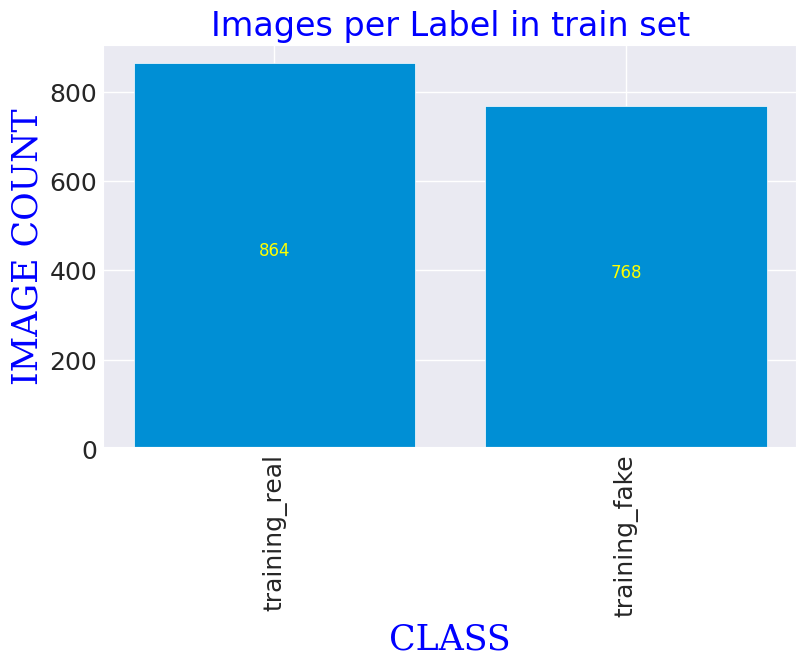

tu
model will be trained with image shape of  ( 224, 224 )

 enter A  to auto balance the train set or enter 
 M to manually balance or hit enter to leave train set unchanged
training data set will be used as is 

Found 1632 validated image filenames belonging to 2 classes.
Found 204 validated image filenames belonging to 2 classes.
Found 205 validated image filenames belonging to 2 classes.
Below are some example training images



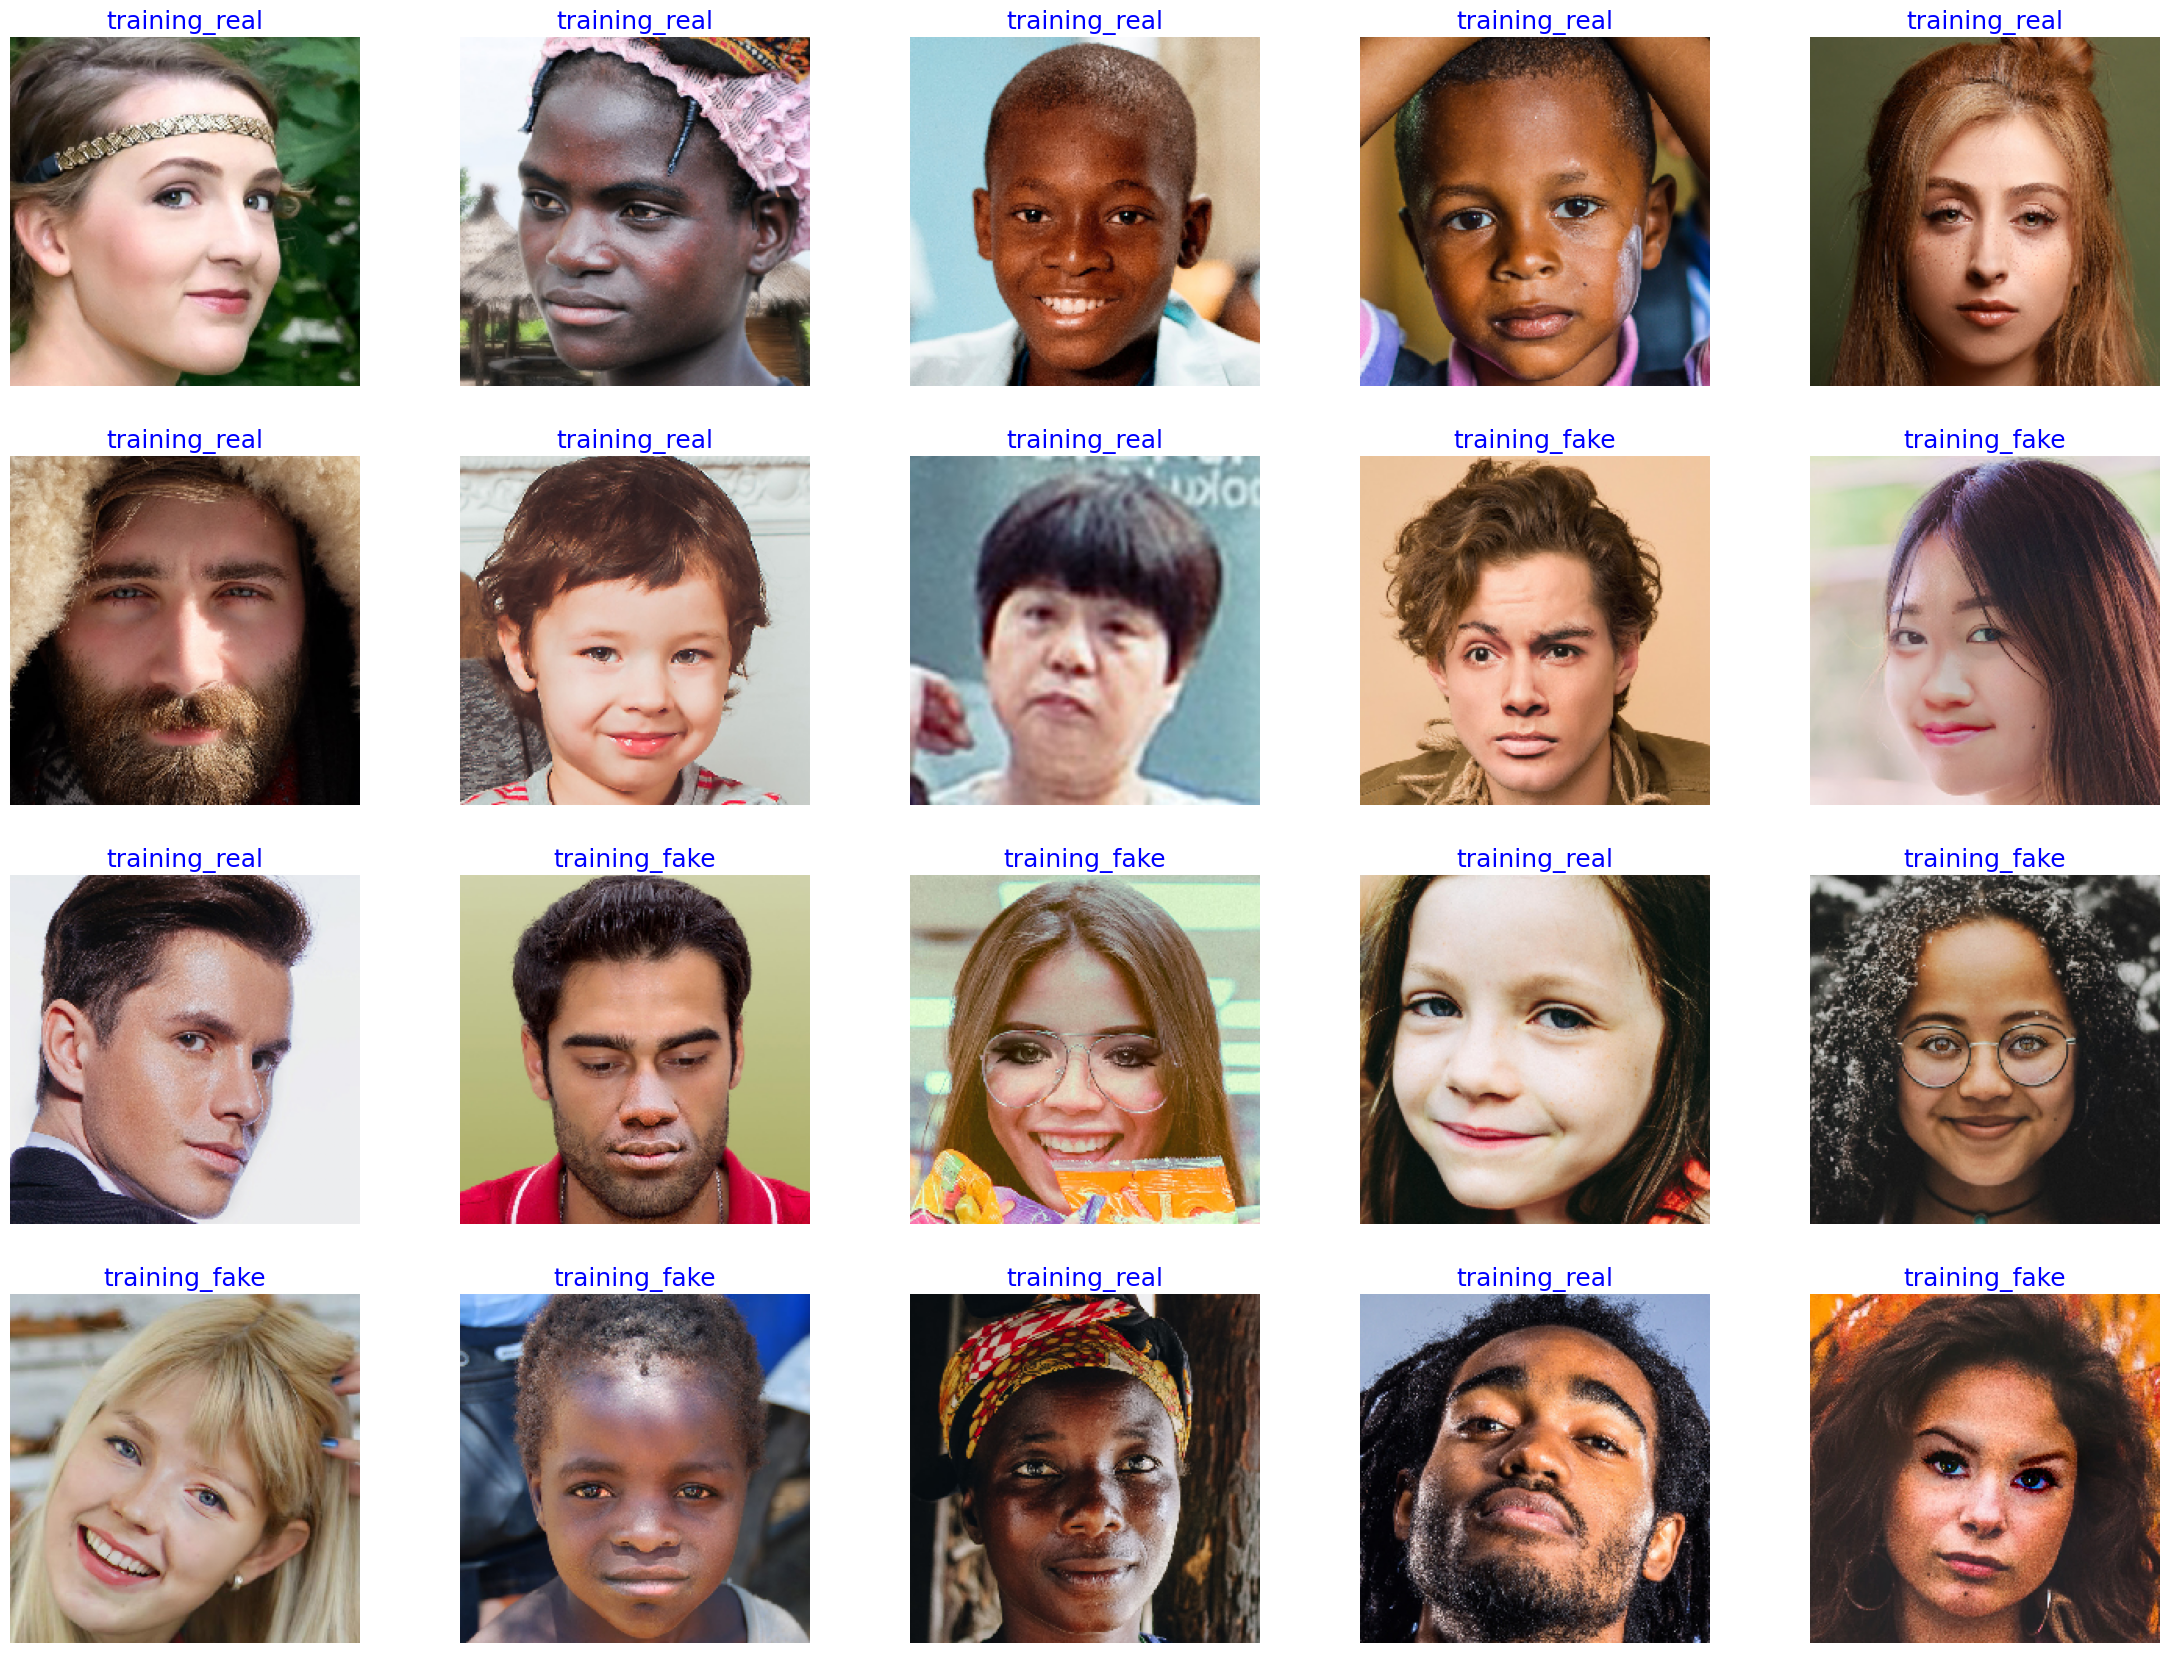

258076736/258076736 [==============================] - 4s 0us/step
Created EfficientNet B7 model with initial learning rate set to 0.001

Your model will start training. After 10 epochs you will be asked if you wish to halt training by entering H
or enter the number of additional epochs to run, then you will be queired again after those epochs complete.
 To decide look at the % decrease in validation loss if it is less than 2% enter H to halt training
 Note your model is set with the weights from the epoch with lowest validation loss

Training will proceed until epoch 10 then you will be asked to

enter H to halt training or enter an integer for how many more epochs to run then be asked again

learning rate will be automatically adjusted during training

Epoch 1/100
82/82 [==============================] - ETA: 0s - loss: 8.4974 - accuracy: 0.5496 - F1_score: 0.5498 - auc: 0.5693
 validation loss of  8.6916 is  0.0000 % below lowest loss, saving weights from epoch 1   as best weights



In [ ]:
msg='enter the full path to the working directory where data will be stored.'
working_dir= '/results' #input(msg)

train_dir = '../input/real-and-fake-face-detection/real_and_fake_face/'
test_dir = valid_dir = None

delimiter = '/'
'''msg='When dealing with very large data sets to save time you may not want to read in all the image files'
print_in_color(msg)
msg='to limit the maximum number of image files in any class you can enter a limiter value'
print_in_color(msg)
msg = 'input a limiter integer value to limit max number of images in a class, for no limit hit enter'
limiter= input(msg)'''

train_df, test_df, valid_df, classes, class_count, max_samples, min_samples, have, wave=make_dataframes(train_dir,test_dir, valid_dir, None)
#msg='Look at the print out to see the average images width and height.\n then entire the image height to be used to train the model'
img_height= 224 #int(input(msg))
#msg=' Enter the image width to be used to train the model'
img_width=224 #int(input(msg))
img_size=(img_height, img_width)
msg=f'model will be trained with image shape of  ( {img_height}, {img_width} )'
print_in_color(msg)
train_df, img_size, classes, class_count = preprocess_dataset(train_df,img_size, max_samples, min_samples, working_dir)
train_gen, test_gen, valid_gen, test_steps= make_gens(20, 'labels', train_df, test_df, valid_df, img_size)
show_image_samples(train_gen )

#VGG19
#random weights
model = make_model(img_size, .001, 'VGG')
train_model(model, classes, train_gen, test_gen, valid_gen, delimiter)
#pretrained weights on imagenet
model = make_model(img_size, .001, 'VGG', 'imagenet')
train_model(model, classes, train_gen, test_gen, valid_gen, delimiter)

#Xception
#random weights
model = make_model(img_size, .001, 'X')
train_model(model, classes, train_gen, test_gen, valid_gen, delimiter)
#pretrained weights on imagenet
model = make_model(img_size, .001, 'X', 'imagenet')
train_model(model, classes, train_gen, test_gen, valid_gen, delimiter)

#EfficientNetB5
#random weights
model = make_model(img_size, .001, 'EfficientNet')
train_model(model, classes, train_gen, test_gen, valid_gen, delimiter)
#pretrained weights on imagenet
model = make_model(img_size, .001, 'EfficientNet', 'imagenet')
train_model(model, classes, train_gen, test_gen, valid_gen, delimiter)

#ResNet50
#random weights
model = make_model(img_size, .001, 'ResNet')
train_model(model, classes, train_gen, test_gen, valid_gen, delimiter)
#pretrained weights on imagenet
model = make_model(img_size, .001, 'ResNet', 'imagenet')
train_model(model, classes, train_gen, test_gen, valid_gen, delimiter)